# Project 4 

## Problem Statement

## Executive Summary

### Import libraries

In [284]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

import myfunctions as f

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

import io

%matplotlib inline

### Data Import

In [285]:
df_train = pd.read_csv('../datasets/train.csv')
df_test = pd.read_csv('../datasets/test.csv')
df_spray = pd.read_csv('../datasets/spray.csv')
df_weather = pd.read_csv('../datasets/weather.csv')

## Exploratory Data Analysis

### Preliminary analysis

In [286]:
df_train.head()

Date                                            Address  \
0  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2  2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3  2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4  2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2          CULEX RESTUANS     62    N MANDELL AVE  T007   
3  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   
4          CULEX RESTUANS     79     W FOSTER AVE  T015   

              AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
2   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279                9   
3    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   
4    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   

   NumMosquitos  WnvPresent  
0             1           0  
1             1           0  
2             1           0  
3             1           0  
4             4           0

In [287]:
df_weather.head()

Station        Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
0        1  2007-05-01    83    50   67     14        51      56    0    2   
1        2  2007-05-01    84    52   68      M        51      57    0    3   
2        1  2007-05-02    59    42   51     -3        42      47   14    0   
3        2  2007-05-02    60    43   52      M        42      47   13    0   
4        1  2007-05-03    66    46   56      2        40      48    9    0   

   ... CodeSum Depth Water1 SnowFall PrecipTotal StnPressure SeaLevel  \
0  ...             0      M      0.0        0.00       29.10    29.82   
1  ...             M      M        M        0.00       29.18    29.82   
2  ...      BR     0      M      0.0        0.00       29.38    30.09   
3  ...   BR HZ     M      M        M        0.00       29.44    30.08   
4  ...             0      M      0.0        0.00       29.39    30.12   

  ResultSpeed ResultDir  AvgSpeed  
0         1.7        27       9.2  
1         2.7        25       9.6  
2        13.0         4      13.4  
3        13.3         2      13.4  
4        11.7         7      11.9  

[5 rows x 22 columns]

In [288]:
df_spray.head()

Date        Time   Latitude  Longitude
0  2011-08-29  6:56:58 PM  42.391623 -88.089163
1  2011-08-29  6:57:08 PM  42.391348 -88.089163
2  2011-08-29  6:57:18 PM  42.391022 -88.089157
3  2011-08-29  6:57:28 PM  42.390637 -88.089158
4  2011-08-29  6:57:38 PM  42.390410 -88.088858

In [289]:
# Check datatypes
print('Train dataset')
print(df_train.dtypes)
print()
print('Weather dataset')
print(df_weather.dtypes)
print()
print('Spray dataset')
print(df_spray.dtypes)
print()

Train dataset
Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object

Weather dataset
Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            object
Depart          object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
Sunrise         object
Sunset          object
CodeSum         object
Depth           object
Water1          object
SnowFall        object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object

Spray dataset
Date        

In [290]:
# Change Date datatype to datetime
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_weather['Date'] = pd.to_datetime(df_weather['Date'])
df_spray['Date'] = pd.to_datetime(df_spray['Date'])

In [291]:
# Check datatypes
print('Train dataset')
print(df_train.dtypes)
print()
print('Weather dataset')
print(df_weather.dtypes)
print()
print('Spray dataset')
print(df_spray.dtypes)
print()

Train dataset
Date                      datetime64[ns]
Address                           object
Species                           object
Block                              int64
Street                            object
Trap                              object
AddressNumberAndStreet            object
Latitude                         float64
Longitude                        float64
AddressAccuracy                    int64
NumMosquitos                       int64
WnvPresent                         int64
dtype: object

Weather dataset
Station                 int64
Date           datetime64[ns]
Tmax                    int64
Tmin                    int64
Tavg                   object
Depart                 object
DewPoint                int64
WetBulb                object
Heat                   object
Cool                   object
Sunrise                object
Sunset                 object
CodeSum                object
Depth                  object
Water1                 object
SnowFall     

In [292]:
# View number of rows
print(f'Train dataset: {df_train.shape[0]}')
print(f'Weather dataset: {df_weather.shape[0]}')
print(f'Spray dataset: {df_spray.shape[0]}')

Train dataset: 10506
Weather dataset: 2944
Spray dataset: 14835


In [293]:
# Check for NA values
print(f'Train dataset: {df_train.isnull().sum().sum()}')
print(f'Weather dataset: {df_weather.isnull().sum().sum()}')
print(f'Spray dataset: {df_spray.isnull().sum().sum()}')

Train dataset: 0
Weather dataset: 0
Spray dataset: 584


In [294]:
# Closer look at Spray dataset
print(df_spray.isnull().sum())

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64


**Comment**

Column 'Time' has 584 empty cells but it is not important for our analysis.
The null values does not appear at random. Therefore, we will drop the column

In [295]:
df_spray.drop(columns='Time',inplace=True)

In [296]:
df_spray.head()

Date   Latitude  Longitude
0 2011-08-29  42.391623 -88.089163
1 2011-08-29  42.391348 -88.089163
2 2011-08-29  42.391022 -88.089157
3 2011-08-29  42.390637 -88.089158
4 2011-08-29  42.390410 -88.088858

## EDA - Weather dataset

In [297]:
# Apply lower() to column names 
df_weather.columns = df_weather.columns.str.lower()

In [298]:
# Define function to replace entires with M, blank spaces and '-' with Nan values, while T was replace with 0.05
# https://wgntv.com/weather/what-are-traces-of-precipitation/
def update_cols(df):
    df.replace(['M','-',' ', '  T'],
               [np.nan, np.nan, np.nan, 0.05],
               inplace = True)
    
update_cols(df_weather)

In [299]:
df_weather.head()

station       date  tmax  tmin tavg depart  dewpoint wetbulb heat cool  \
0        1 2007-05-01    83    50   67     14        51      56    0    2   
1        2 2007-05-01    84    52   68    NaN        51      57    0    3   
2        1 2007-05-02    59    42   51     -3        42      47   14    0   
3        2 2007-05-02    60    43   52    NaN        42      47   13    0   
4        1 2007-05-03    66    46   56      2        40      48    9    0   

   ... codesum depth water1 snowfall  preciptotal stnpressure sealevel  \
0  ...     NaN     0    NaN      0.0         0.00       29.10    29.82   
1  ...     NaN   NaN    NaN      NaN         0.00       29.18    29.82   
2  ...      BR     0    NaN      0.0         0.00       29.38    30.09   
3  ...   BR HZ   NaN    NaN      NaN         0.00       29.44    30.08   
4  ...     NaN     0    NaN      0.0         0.00       29.39    30.12   

  resultspeed resultdir  avgspeed  
0         1.7        27       9.2  
1         2.7        25       9.6  
2        13.0         4      13.4  
3        13.3         2      13.4  
4        11.7         7      11.9  

[5 rows x 22 columns]

In [300]:
# Check for null
df_weather.isnull().sum().sort_values(ascending=False)

water1         2944
codesum        1609
sunrise        1472
depart         1472
snowfall       1472
depth          1472
sunset         1472
heat             11
tavg             11
cool             11
sealevel          9
stnpressure       4
wetbulb           4
avgspeed          3
preciptotal       2
resultdir         0
dewpoint          0
resultspeed       0
tmin              0
tmax              0
date              0
station           0
dtype: int64

In [301]:
# Drop water1 column as it is missing all the data
df_weather.drop(['water1'], axis = 1, inplace= True)

# Replace Nan values in codesum column with 'MODERATE'
df_weather['codesum'] = df_weather['codesum'].replace(np.nan, 'MODERATE')

In [302]:
# Define function to convert temperature to Celsius
def fahrenheit_to_celsius(df,column_names):
    '''
    Convert temperature from Fahrenheit to Celsius
    
    Takes:
    df - DataFrame
    column_names - (list of str) - names of columns for conversion
    
    Returns:
    df
    '''
    for name in column_names:
        try:
            df[name] = round((df[name]-32)*5/9,2)
        except TypeError:
            continue
    return df

fahrenheit_to_celsius(df_weather,
                      ['tmax','tmin','tavg','depart','dewpoint','wetbulb'])

station       date   tmax   tmin tavg depart  dewpoint wetbulb heat  \
0           1 2007-05-01  28.33  10.00   67     14     10.56      56    0   
1           2 2007-05-01  28.89  11.11   68    NaN     10.56      57    0   
2           1 2007-05-02  15.00   5.56   51     -3      5.56      47   14   
3           2 2007-05-02  15.56   6.11   52    NaN      5.56      47   13   
4           1 2007-05-03  18.89   7.78   56      2      4.44      48    9   
...       ...        ...    ...    ...  ...    ...       ...     ...  ...   
2939        2 2014-10-29   9.44   4.44   45    NaN      1.11      42   20   
2940        1 2014-10-30  10.56   0.00   42     -4      1.11      40   23   
2941        2 2014-10-30  11.67   2.78   45    NaN      1.67      42   20   
2942        1 2014-10-31   8.33   0.56   40     -6     -3.89      33   25   
2943        2 2014-10-31   9.44   1.11   42    NaN     -1.67      36   23   

     cool  ... sunset   codesum depth snowfall preciptotal stnpressure  \
0       2  ...   1849  MODERATE     0      0.0        0.00       29.10   
1       3  ...    NaN  MODERATE   NaN      NaN        0.00       29.18   
2       0  ...   1850        BR     0      0.0        0.00       29.38   
3       0  ...    NaN     BR HZ   NaN      NaN        0.00       29.44   
4       0  ...   1851  MODERATE     0      0.0        0.00       29.39   
...   ...  ...    ...       ...   ...      ...         ...         ...   
2939    0  ...    NaN  MODERATE   NaN      NaN        0.00       29.42   
2940    0  ...   1649  MODERATE     0      0.0        0.00       29.34   
2941    0  ...    NaN        RA   NaN      NaN        0.05       29.41   
2942    0  ...   1647     RA SN     0      0.1        0.03       29.49   
2943    0  ...    NaN  RA SN BR   NaN      NaN        0.04       29.54   

     sealevel resultspeed  resultdir  avgspeed  
0       29.82         1.7         27       9.2  
1       29.82         2.7         25       9.6  
2       30.09        13.0          4      13.4  
3       30.08        13.3          2      13.4  
4       30.12        11.7          7      11.9  
...       ...         ...        ...       ...  
2939    30.07         8.5         29       9.0  
2940    30.09         5.1         24       5.5  
2941    30.10         5.9         23       6.5  
2942    30.20        22.6         34      22.9  
2943    30.20        21.7         34      22.6  

[2944 rows x 21 columns]

In [303]:
df_weather.dtypes

station                 int64
date           datetime64[ns]
tmax                  float64
tmin                  float64
tavg                   object
depart                 object
dewpoint              float64
wetbulb                object
heat                   object
cool                   object
sunrise                object
sunset                 object
codesum                object
depth                  object
snowfall               object
preciptotal            object
stnpressure            object
sealevel               object
resultspeed           float64
resultdir               int64
avgspeed               object
dtype: object

In [304]:
# Create individual columns for year, month and day
df_weather['year'] = df_weather['date'].dt.year
df_weather['month'] = df_weather['date'].dt.month
df_weather['day'] = df_weather['date'].dt.day

In [305]:
col_toflt = ['preciptotal', 'stnpressure', 'sealevel',
             'avgspeed', 'preciptotal', 'tavg',
             'depart', 'wetbulb', 'heat', 'cool']

for col in col_toflt:
    df_weather[col] = df_weather[col].astype(float)

---

In [124]:
# Masking weather data by station
df_weather_st1 = df_weather[df_weather['station']==1]
df_weather_st2 = df_weather[df_weather['station']==2]

In [127]:
# Merging df_weather_st1 and df_weather_st2 in one rows
weather_df = pd.merge(df_weather_st1,df_weather_st2,on='date'); weather_df

station_x       date  tmax_x  tmin_x tavg_x depart_x  dewpoint_x  \
0             1 2007-05-01   28.33   10.00     67       14       10.56   
1             1 2007-05-02   15.00    5.56     51       -3        5.56   
2             1 2007-05-03   18.89    7.78     56        2        4.44   
3             1 2007-05-04   18.89    9.44     58        4        5.00   
4             1 2007-05-05   18.89   11.67     60        5        3.33   
...         ...        ...     ...     ...    ...      ...         ...   
1467          1 2014-10-27   25.00   10.56     64       16       10.56   
1468          1 2014-10-28   20.00    7.22     57       10        3.33   
1469          1 2014-10-29    9.44    2.22     43       -4        0.00   
1470          1 2014-10-30   10.56    0.00     42       -4        1.11   
1471          1 2014-10-31    8.33    0.56     40       -6       -3.89   

     wetbulb_x heat_x cool_x  ... codesum_y depth_y water1_y snowfall_y  \
0           56      0      2  ...       NaN     NaN      NaN        NaN   
1           47     14      0  ...     BR HZ     NaN      NaN        NaN   
2           48      9      0  ...        HZ     NaN      NaN        NaN   
3           50      7      0  ...       NaN     NaN      NaN        NaN   
4           49      5      0  ...       NaN     NaN      NaN        NaN   
...        ...    ...    ...  ...       ...     ...      ...        ...   
1467        58      1      0  ...        RA     NaN      NaN        NaN   
1468        47      8      0  ...        RA     NaN      NaN        NaN   
1469        40     22      0  ...       NaN     NaN      NaN        NaN   
1470        40     23      0  ...        RA     NaN      NaN        NaN   
1471        33     25      0  ...  RA SN BR     NaN      NaN        NaN   

      preciptotal_y stnpressure_y sealevel_y resultspeed_y resultdir_y  \
0              0.00         29.18      29.82           2.7          25   
1              0.00         29.44      30.08          13.3           2   
2              0.00         29.46      30.12          12.9           6   
3              0.00         29.36      30.04          10.1           7   
4              0.05         29.46      30.09          11.2           7   
...             ...           ...        ...           ...         ...   
1467           0.02         29.00      29.67          12.7          19   
1468           0.03         29.23      29.85          14.0          26   
1469           0.00         29.42      30.07           8.5          29   
1470           0.05         29.41      30.10           5.9          23   
1471           0.04         29.54      30.20          21.7          34   

      avgspeed_y  
0            9.6  
1           13.4  
2           13.2  
3           10.4  
4           11.5  
...          ...  
1467        13.6  
1468        14.6  
1469         9.0  
1470         6.5  
1471        22.6  

[1472 rows x 43 columns]

In [ ]:
# Fill null values with column median
df_weather['preciptotal'] = df_weather['preciptotal'].fillna(df_weather['preciptotal'].median())
df_weather['avgspeed'] = df_weather['avgspeed'].fillna(df_weather['avgspeed'].median())
df_weather['wetbulb'] = df_weather['wetbulb'].fillna(df_weather['wetbulb'].median())
df_weather['stnpressure'] = df_weather['stnpressure'].fillna(df_weather['stnpressure'].median())
df_weather['sealevel'] = df_weather['sealevel'].fillna(df_weather['sealevel'].median())
df_weather['heat'] = df_weather['heat'].fillna(df_weather['heat'].median())
df_weather['cool'] = df_weather['cool'].fillna(df_weather['cool'].median())

# Fill null values of Tavg column with the average of Tmax and Tmin columns (Tmax + Tmin)/2
df_weather['tavg'] = df_weather.apply(lambda row: (row['tmax'] + row['tmin']) * 0.5
                                      if pd.isnull(row['tavg']) else row['tavg'], axis=1)

In [121]:
# Replacing wrong data and converting dtype
# df_weather['Tavg'] = df_weather['Tavg'].replace('M',-1).astype('int')
# df_weather['Depart'] = df_weather['Depart'].replace('M',-1).astype('int')
# df_weather['WetBulb'] = df_weather['WetBulb'].replace('M',-1).astype('int')

In [122]:
# Replacing wrong data and converting dtype
# df_weather['Heat'] = df_weather['Heat'].replace('M',-1).astype('int')
# df_weather['Cool'] = df_weather['Cool'].replace('M',-1).astype('int')
# df_weather['Sunrise'] = df_weather['Sunrise'].replace('-',-1).astype('int')
# df_weather['Sunset'] = df_weather['Sunset'].replace('-',-1).astype('int')
# df_weather['PrecipTotal'] = df_weather['PrecipTotal'].replace('M',-1).replace('  T',-1).astype('float')
# df_weather['SeaLevel'] = df_weather['SeaLevel'].replace('M',-1).astype('float')
# df_weather['AvgSpeed'] = df_weather['AvgSpeed'].replace('M',-1).astype('float')
# df_weather['StnPressure'] = df_weather['StnPressure'].replace('M',-1).astype('float')
# df_weather['AvgSpeed'] = df_weather['AvgSpeed'].replace('M',-1).astype('float'K)

In [ ]:
# def mirror_columns(columns):
#     df_weather[columns] = df_weather.apply(lambda x: df_weather.iloc[::2][columns].values.repeat(2))
    
# # Fill in the missing data from station 2 by mirroring station 1
# mirror_columns('depart')
# mirror_columns('sunrise')
# mirror_columns('sunset')
# mirror_columns('depth')
# mirror_columns('snowfall')

## EDA - Spray data

In [307]:
# Dividing data into parts
df_spray['Day'] = df_spray['Date'].map(lambda x: x.day)
df_spray['Month'] = df_spray['Date'].map(lambda x: x.month)
df_spray['Year'] = df_spray['Date'].map(lambda x: x.year)

In [308]:
# Choosing columns for clustering
X = df_spray[['Day', 'Month','Year','Latitude', 'Longitude']]

In [309]:
# Standartizing data
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
# Training DBSCAN for predicting 
dbs = DBSCAN(eps=0.1)
dbs.fit(X)

DBSCAN(algorithm='auto', eps=0.1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [310]:
# Verifying labels (there should be 13)
np.unique(dbs.labels_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [311]:
# Adding labels to spray df
df_spray['labels'] = dbs.labels_

In [312]:
df_spray.head()

Date   Latitude  Longitude  Day  Month  Year  labels
0 2011-08-29  42.391623 -88.089163   29      8  2011       0
1 2011-08-29  42.391348 -88.089163   29      8  2011       0
2 2011-08-29  42.391022 -88.089157   29      8  2011       0
3 2011-08-29  42.390637 -88.089158   29      8  2011       0
4 2011-08-29  42.390410 -88.088858   29      8  2011       0

In [ ]:
df_spray = df_spray.loc[df_spray['Longitude'] > -88]

In [313]:
# Looking at result
clusteres_df = df_spray.groupby(['labels','Date']).count()
clusteres_df.sort_values('Date')

Latitude  Longitude   Day  Month  Year
labels Date                                              
0      2011-08-29        95         95    95     95    95
1      2011-09-07      2114       2114  2114   2114  2114
2      2013-07-17       556        556   556    556   556
3      2013-07-17      1646       1646  1646   1646  1646
4      2013-07-25      1607       1607  1607   1607  1607
5      2013-08-08      1195       1195  1195   1195  1195
6      2013-08-15      2668       2668  2668   2668  2668
7      2013-08-16       141        141   141    141   141
8      2013-08-22       845        845   845    845   845
9      2013-08-22       742        742   742    742   742
10     2013-08-29      1371       1371  1371   1371  1371
11     2013-08-29       931        931   931    931   931
12     2013-09-05       924        924   924    924   924

In [314]:
# Defining min and max latitudes and longitudes for each cluster
min_spray = max_spray = df_spray.groupby('labels')[['Date','Latitude','Longitude']].min()
max_spray = max_spray = df_spray.groupby('labels')[['Latitude','Longitude']].max()

In [315]:
# Merging min and max df in one
min_max_spray = pd.merge(min_spray,max_spray,on='labels')
# Renaming columns to make them more understandable
min_max_spray.columns = ['Date', 'Latitude_min', 'Longitude_min', 'Latitude_max', 'Longitude_max'] 

In [316]:
min_max_spray

Date  Latitude_min  Longitude_min  Latitude_max  Longitude_max
labels                                                                     
0      2011-08-29     42.389460     -88.096468     42.395983     -88.087988
1      2011-09-07     41.968435     -87.836560     41.997028     -87.787710
2      2013-07-17     41.972617     -87.871023     42.015098     -87.762165
3      2013-07-17     41.714098     -87.672362     41.743287     -87.629355
4      2013-07-25     41.939308     -87.739840     41.968097     -87.707987
5      2013-08-08     41.917227     -87.716847     41.946703     -87.678060
6      2013-08-15     41.887825     -87.818408     41.966532     -87.745625
7      2013-08-16     41.911375     -87.785792     41.964712     -87.746675
8      2013-08-22     41.873487     -87.730655     41.895475     -87.701623
9      2013-08-22     41.713925     -87.623142     41.765277     -87.586727
10     2013-08-29     41.758812     -87.741315     41.786010     -87.694118
11     2013-08-29     41.976280     -87.698858     41.997808     -87.660885
12     2013-09-05     41.976773     -87.846338     42.018907     -87.789812

## EDA - Train data

In [317]:
df_train.head()

Date                                            Address  \
0 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2 2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2          CULEX RESTUANS     62    N MANDELL AVE  T007   
3  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   
4          CULEX RESTUANS     79     W FOSTER AVE  T015   

              AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
2   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279                9   
3    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   
4    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   

   NumMosquitos  WnvPresent  
0             1           0  
1             1           0  
2             1           0  
3             1           0  
4             4           0

In [324]:
df_train_bydate_trap = df_train.groupby(['Date','Trap'])

In [321]:
def chkWNV(series):
    return 1 if series.sum() > 0 else 0

In [360]:
# Merge by Date, followed by Trap
df_train_2 = pd.DataFrame(columns=['Date', 'Address', 'Species',
                                   'Block', 'Street', 'Trap',
                                   'AddressNumberAndStreet',
                                   'Latitude', 'Longitude',
                                   'AddressAccuracy',
                                   'NumMosquitos', 'WnvPresent'])

for date_trap, df in df_train_bydate_trap:
    df_train_2.loc[len(df_train_2)] = [date_trap[0],
                                       np.unique(df['Address'])[0],
                                       np.unique(df['Species']),
                                       np.unique(df['Block'])[0],
                                       np.unique(df['Street'])[0],
                                       date_trap[1], 
                                       np.unique(df['AddressNumberAndStreet'])[0], 
                                       np.unique(df['Latitude'])[0],
                                       np.unique(df['Longitude'])[0],
                                       np.unique(df['AddressAccuracy'])[0],
                                       sum(df['NumMosquitos']),
                                       chkWNV(df['WnvPresent'])]

In [361]:
df_train_2.head()

Date                                            Address  \
0 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1 2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
2 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
3 2007-05-29   1500 West Webster Avenue, Chicago, IL 60614, USA   
4 2007-05-29     2500 West Grand Avenue, Chicago, IL 60654, USA   

                                    Species Block           Street  Trap  \
0  [CULEX PIPIENS/RESTUANS, CULEX RESTUANS]    41   N OAK PARK AVE  T002   
1                          [CULEX RESTUANS]    62    N MANDELL AVE  T007   
2  [CULEX PIPIENS/RESTUANS, CULEX RESTUANS]    79     W FOSTER AVE  T015   
3                          [CULEX RESTUANS]    15    W WEBSTER AVE  T045   
4                          [CULEX RESTUANS]    25      W GRAND AVE  T046   

              AddressNumberAndStreet   Latitude  Longitude AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991               9   
1   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279               9   
2    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812               8   
3   1500  W WEBSTER AVE, Chicago, IL  41.921600 -87.666455               8   
4     2500  W GRAND AVE, Chicago, IL  41.891118 -87.654491               8   

  NumMosquitos WnvPresent  
0            2          0  
1            1          0  
2            5          0  
3            2          0  
4            1          0

In [362]:
df_train_2['Species'] = df_train_2['Species'].apply(','.join)

In [366]:
df_train_2['isWNVspecies'] = df_train_2['Species'].str.contains('PIPIENS|RESTUANS').astype(int)

In [367]:
df_train_2.head()

Date                                            Address  \
0 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1 2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
2 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
3 2007-05-29   1500 West Webster Avenue, Chicago, IL 60614, USA   
4 2007-05-29     2500 West Grand Avenue, Chicago, IL 60654, USA   

                                 Species Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS,CULEX RESTUANS    41   N OAK PARK AVE  T002   
1                         CULEX RESTUANS    62    N MANDELL AVE  T007   
2  CULEX PIPIENS/RESTUANS,CULEX RESTUANS    79     W FOSTER AVE  T015   
3                         CULEX RESTUANS    15    W WEBSTER AVE  T045   
4                         CULEX RESTUANS    25      W GRAND AVE  T046   

              AddressNumberAndStreet   Latitude  Longitude AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991               9   
1   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279               9   
2    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812               8   
3   1500  W WEBSTER AVE, Chicago, IL  41.921600 -87.666455               8   
4     2500  W GRAND AVE, Chicago, IL  41.891118 -87.654491               8   

  NumMosquitos WnvPresent  isWNVspecies  
0            2          0             1  
1            1          0             1  
2            5          0             1  
3            2          0             1  
4            1          0             1

In [377]:
df_train[(df_train['Date']==np.datetime64('2007-07-25')) & (df_train['Trap'] == 'T115')]

Date                              Address                 Species  \
601 2007-07-25  South Doty Avenue, Chicago, IL, USA  CULEX PIPIENS/RESTUANS   
602 2007-07-25  South Doty Avenue, Chicago, IL, USA  CULEX PIPIENS/RESTUANS   
603 2007-07-25  South Doty Avenue, Chicago, IL, USA  CULEX PIPIENS/RESTUANS   
604 2007-07-25  South Doty Avenue, Chicago, IL, USA  CULEX PIPIENS/RESTUANS   
605 2007-07-25  South Doty Avenue, Chicago, IL, USA  CULEX PIPIENS/RESTUANS   
..         ...                                  ...                     ...   
660 2007-07-25  South Doty Avenue, Chicago, IL, USA           CULEX PIPIENS   
661 2007-07-25  South Doty Avenue, Chicago, IL, USA           CULEX PIPIENS   
662 2007-07-25  South Doty Avenue, Chicago, IL, USA           CULEX PIPIENS   
663 2007-07-25  South Doty Avenue, Chicago, IL, USA        CULEX SALINARIUS   
664 2007-07-25  South Doty Avenue, Chicago, IL, USA         CULEX TERRITANS   

     Block       Street  Trap         AddressNumberAndStreet   Latitude  \
601     12   S DOTY AVE  T115  1200  S DOTY AVE, Chicago, IL  41.673408   
602     12   S DOTY AVE  T115  1200  S DOTY AVE, Chicago, IL  41.673408   
603     12   S DOTY AVE  T115  1200  S DOTY AVE, Chicago, IL  41.673408   
604     12   S DOTY AVE  T115  1200  S DOTY AVE, Chicago, IL  41.673408   
605     12   S DOTY AVE  T115  1200  S DOTY AVE, Chicago, IL  41.673408   
..     ...          ...   ...                            ...        ...   
660     12   S DOTY AVE  T115  1200  S DOTY AVE, Chicago, IL  41.673408   
661     12   S DOTY AVE  T115  1200  S DOTY AVE, Chicago, IL  41.673408   
662     12   S DOTY AVE  T115  1200  S DOTY AVE, Chicago, IL  41.673408   
663     12   S DOTY AVE  T115  1200  S DOTY AVE, Chicago, IL  41.673408   
664     12   S DOTY AVE  T115  1200  S DOTY AVE, Chicago, IL  41.673408   

     Longitude  AddressAccuracy  NumMosquitos  WnvPresent  
601 -87.599862                5            50           0  
602 -87.599862                5            50           0  
603 -87.599862                5            50           1  
604 -87.599862                5            50           0  
605 -87.599862                5            50           0  
..         ...              ...           ...         ...  
660 -87.599862                5            50           1  
661 -87.599862                5            50           1  
662 -87.599862                5            50           0  
663 -87.599862                5             1           0  
664 -87.599862                5             1           0  

[64 rows x 12 columns]

In [375]:
df_train_2[df_train_2['NumMosquitos']==3002]

Date                              Address  \
344 2007-07-25  South Doty Avenue, Chicago, IL, USA   

                                               Species Block       Street  \
344  CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX SAL...    12   S DOTY AVE   

     Trap         AddressNumberAndStreet   Latitude  Longitude  \
344  T115  1200  S DOTY AVE, Chicago, IL  41.673408 -87.599862   

    AddressAccuracy NumMosquitos WnvPresent  isWNVspecies  
344               5         3002          1             1

---

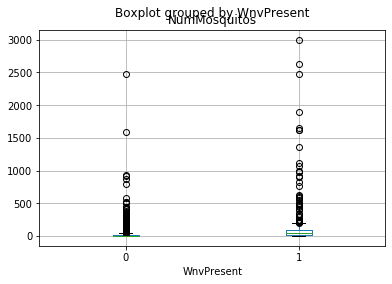

In [368]:
# Number of cought mosquitos by presence of virus
df_train_2.boxplot(by='WnvPresent',column='NumMosquitos');
# Virus is present if number of mosquitos is high

# These test results are organized in such a way that when the number of mosquitos exceed 50, 
# they are split into another record (another row in the dataset), 
# such that the number of mosquitos are capped at 50.

In [ ]:
# Number of misquitos by species of mosquitos
df_train.boxplot(by='Species',column='NumMosquitos',rot=90);
# 3 species of mosquitos caught much frequantly than others

# Records exist only when a particular species of mosquitos is found at a certain trap 
# at a certain time. Date: date that the WNV test is performed

In [ ]:
# NumMosquitos and WnvPresent by species
df_train.groupby('Species')[['NumMosquitos','WnvPresent']].sum()
# 3 species cought much frequantly and they contain virus
# ? does other species are rare in the area
# ? does it mean that other species can have the virus but due to their rareness we don't see it

In [6]:
df_train['Is_Satellite'] = [1 if len(row) > 4 else 0 for row in df_train['Trap']]

In [7]:
df_train['Is_Satellite'].value_counts()

0    10492
1       14
Name: Is_Satellite, dtype: int64

In [8]:
df_train['Trap'].value_counts()

T900     750
T115     542
T138     314
T002     185
T135     183
        ... 
T238       7
T076       5
T094B      5
T237       3
T040       2
Name: Trap, Length: 136, dtype: int64

In [14]:
df_train['Species'].value_counts()

CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: Species, dtype: int64

In [15]:
pd.pivot_table(df_train, index='Species', values='WnvPresent')

WnvPresent
Species                           
CULEX ERRATICUS           0.000000
CULEX PIPIENS             0.088922
CULEX PIPIENS/RESTUANS    0.055135
CULEX RESTUANS            0.017883
CULEX SALINARIUS          0.000000
CULEX TARSALIS            0.000000
CULEX TERRITANS           0.000000

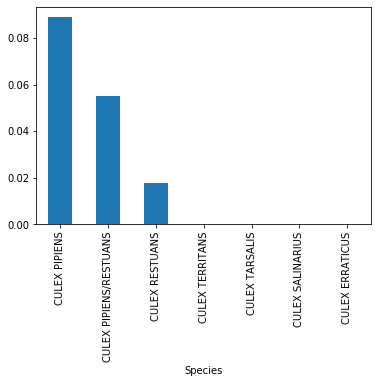

In [16]:
df_train.groupby('Species')['WnvPresent'].mean().sort_values(ascending=False).plot.bar();

In [17]:
top10 = df_train.groupby('Trap')['WnvPresent','NumMosquitos'].mean().sort_values(by='WnvPresent',ascending=False)
top10.head(10)

C:\Users\junyu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


WnvPresent  NumMosquitos
Trap                           
T143     0.193548      7.419355
T006     0.166667      4.458333
T005     0.142857      3.571429
T233     0.140000     15.160000
T014     0.133333     12.133333
T096     0.120000     11.560000
T003     0.114754     11.032787
T015     0.114286      4.828571
T235     0.112903      8.983871
T054C    0.111111     16.111111

(array([5585., 1411.,  697.,  492.,  317.,  259.,  196.,  220.,  159.,
        1170.]),
 array([ 1. ,  5.9, 10.8, 15.7, 20.6, 25.5, 30.4, 35.3, 40.2, 45.1, 50. ]),
 <a list of 10 Patch objects>)

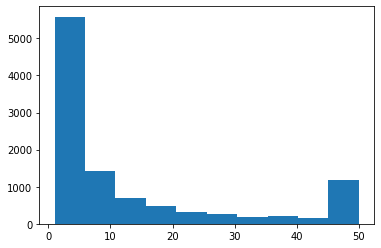

In [18]:
plt.hist(data=df_train,x='NumMosquitos')

In [19]:
df_train.loc[(df_train['Date'].isin(date2013))]

Date                                            Address  \
8114   2013-06-07  4100 North Oak Park Avenue, Chicago, IL 60634,...   
8115   2013-06-07        1100 Roosevelt Road, Chicago, IL 60608, USA   
8116   2013-06-07    2200 North Cannon Drive, Chicago, IL 60614, USA   
8117   2013-06-07      1700 West 95th Street, Chicago, IL 60643, USA   
8118   2013-06-07  8900 South Carpenter Street, Chicago, IL 60620...   
...           ...                                                ...   
10501  2013-09-26      5100 West 72nd Street, Chicago, IL 60638, USA   
10502  2013-09-26    5800 North Ridge Avenue, Chicago, IL 60660, USA   
10503  2013-09-26  1700 North Ashland Avenue, Chicago, IL 60622, USA   
10504  2013-09-26   7100 North Harlem Avenue, Chicago, IL 60631, USA   
10505  2013-09-26      4200 West 65th Street, Chicago, IL 60621, USA   

                      Species  Block           Street  Trap  \
8114           CULEX RESTUANS     41   N OAK PARK AVE  T002   
8115           CULEX RESTUANS     11      W ROOSEVELT  T048   
8116           CULEX RESTUANS     22      N CANNON DR  T054   
8117           CULEX RESTUANS     17        W 95TH ST  T094   
8118   CULEX PIPIENS/RESTUANS     89   S CARPENTER ST  T159   
...                       ...    ...              ...   ...   
10501  CULEX PIPIENS/RESTUANS     51        W 72ND ST  T035   
10502  CULEX PIPIENS/RESTUANS     58      N RIDGE AVE  T231   
10503  CULEX PIPIENS/RESTUANS     17    N ASHLAND AVE  T232   
10504  CULEX PIPIENS/RESTUANS     71     N HARLEM AVE  T233   
10505  CULEX PIPIENS/RESTUANS     42        W 65TH ST  T235   

                  AddressNumberAndStreet   Latitude  Longitude  \
8114   4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991   
8115      1100  W ROOSEVELT, Chicago, IL  41.867108 -87.654224   
8116      2200  N CANNON DR, Chicago, IL  41.921965 -87.632085   
8117        1700  W 95TH ST, Chicago, IL  41.720848 -87.666014   
8118   8900  S CARPENTER ST, Chicago, IL  41.732984 -87.649642   
...                                  ...        ...        ...   
10501       5100  W 72ND ST, Chicago, IL  41.763733 -87.742302   
10502     5800  N RIDGE AVE, Chicago, IL  41.987280 -87.666066   
10503   1700  N ASHLAND AVE, Chicago, IL  41.912563 -87.668055   
10504    7100  N HARLEM AVE, Chicago, IL  42.009876 -87.807277   
10505       4200  W 65TH ST, Chicago, IL  41.776428 -87.627096   

       AddressAccuracy  NumMosquitos  WnvPresent  Is_Satellite  
8114                 9            19           0             0  
8115                 8             2           0             0  
8116                 8             1           0             0  
8117                 9             4           0             0  
8118                 8             4           0             0  
...                ...           ...         ...           ...  
10501                8             6           1             0  
10502                8             5           0             0  
10503                9             1           0             0  
10504                9             5           0             0  
10505                8             1           0             0  

[169 rows x 13 columns]

In [ ]:
test = test[['Date','Latitude','Longitude','WnvPresent']]
test.head()

In [20]:
for i in date2013:
    nownv2013 = df_train.loc[(df_train['Date'] == i) & (df_train['WnvPresent'] == 0)]
    wnv2013 = df_train.loc[(df_train['Date'] == i) & (df_train['WnvPresent'] == 1)]
    if i == '2013-06-07':
        spraying = spray2013.loc[spray2013['Date'] == i]
    else:
        spraying = spraying.append(spray2013.loc[spray2013['Date'] == i])
    f.gen_map()
    locations = nownv2013[['Longitude', 'Latitude']].drop_duplicates().values
    locations1 = wnv2013[['Longitude', 'Latitude']].drop_duplicates().values
    locations2 = spraying[['Longitude', 'Latitude']].drop_duplicates().values
    plt.scatter(locations2[:,0], locations2[:,1], marker='o', c='g')
    plt.scatter(locations[:,0], locations[:,1], marker='x', c='b')
    plt.scatter(locations1[:,0], locations1[:,1], marker='x', c='r')
    plt.title(i)
    plt.pause(0.05)

plt.show()

NameError: name 'spray2013' is not defined

In [ ]:
spray2013.groupby(['Date']).mean()

In [ ]:
f.gen_map()

locations = spray2013[['Longitude', 'Latitude']].drop_duplicates().values
locations1 = nownv2013[['Longitude', 'Latitude']].drop_duplicates().values
locations2 = wnv2013[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='o', c='g')
plt.scatter(locations1[:,0], locations1[:,1], marker='x', c='b')
plt.scatter(locations2[:,0], locations2[:,1], marker='x', c='r');

In [ ]:
df_train.loc[pd.DatetimeIndex(df_train['Date']).year == 2011]

In [ ]:
spray_days = df_spray.groupby('Date')['Latitude','Longitude'].max()
fig, axes = plt.subplots(5,2,figsize=(18,25))
f.gen_map()
for i in range(0,10):
    df_temp = df_spray[df_spray['Date']==spray_days.index[i]]
    origin = [41.6, -88.0]              # lat/long of origin (lower left corner)
    upperRight = [42.1, -87.5]          # lat/long of upper right corner


    # generate some data to overlay
    numPoints = 50
    lats = df_temp['Latitude']
    longs = df_temp['Longitude']

    intersection = [41.909614, -87.746134]  # co-ordinates of intersection of IL64 / IL50 according to Google Earth

    if i <=4:
        c=0
        a = i
    else:
        c=1
        a = i-5
    # generate plot
    
    axes[a,c].scatter(x=longs, y=lats, c='r', s=20)
    axes[a,c].scatter(x=intersection[1], y=intersection[0], c='b', s=60, marker='s')
    axes[a,c].set_title(spray_days.index[i],color='white')
    
plt.show()

## Feature Engineering

In [43]:
# Creating a new column is_spray and setting all cells as False
df_train['is_spray'] = False

In [42]:
# Setting time delta as 30 days. The spray lasts
# A typical mosquito treatment lasts about 30 days. 
# https://www.callnorthwest.com/2019/05/how-long-does-a-mosquito-treatment-last/
tdelta_min = dt.timedelta(days=0)
tdelta_max = dt.timedelta(days=30)
# Creating a new DataFrame
is_spray_df = pd.DataFrame(columns=df_train.columns)
# Looping through df with min,max latitudes and longitudes 
for i,spray in min_max_spray.iterrows():
    long_min = spray['Longitude_min']
    long_max = spray['Longitude_max']
    lat_min = spray['Latitude_min']
    lat_max = spray['Latitude_max']
# Looping through train df, checking is latitudes and longitudes lay between min and max
# and date is the same date or date +30 days of spraying 
    for j,row in df_train.iterrows():
        if ((lat_min <= row['Latitude'] <= lat_max) &
            (long_min <= row['Longitude'] <= long_max) &
            (tdelta_min < (row['Date']-spray['Date']) <=tdelta_max)):
            row['is_spray'] = True
            is_spray_df = is_spray_df.append(row)

In [44]:
# Joining new df with spray info with train data
df_train_spray = pd.concat([df_train,is_spray_df])

In [45]:
# Dropping rows which were change in is_spray to True
df_train_spray = df_train_spray.drop_duplicates(subset=['Date', 'Address', 'Species', 
        'Block', 'Street', 'Trap','AddressNumberAndStreet', 'Latitude', 'Longitude', 
        'AddressAccuracy','NumMosquitos', 'WnvPresent'],keep='last')

In [46]:
# Checking number of rows in train which were sprayed
df_train_spray['is_spray'].value_counts()

0.0    9468
1.0     225
Name: is_spray, dtype: int64

In [47]:
# Merging weather and train df
main_df = pd.merge(df_train_spray,weather_df,on='Date')
main_df.head()

Date                                            Address  \
0 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2 2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                  Species Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS    41   N OAK PARK AVE  T002   
1          CULEX RESTUANS    41   N OAK PARK AVE  T002   
2          CULEX RESTUANS    62    N MANDELL AVE  T007   
3  CULEX PIPIENS/RESTUANS    79     W FOSTER AVE  T015   
4          CULEX RESTUANS    79     W FOSTER AVE  T015   

              AddressNumberAndStreet   Latitude  Longitude AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991               9   
1  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991               9   
2   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279               9   
3    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812               8   
4    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812               8   

   ... CodeSum_y Depth_y  Water1_y  SnowFall_y  PrecipTotal_y  StnPressure_y  \
0  ...     BR HZ       M         M           M            0.0          29.44   
1  ...     BR HZ       M         M           M            0.0          29.44   
2  ...     BR HZ       M         M           M            0.0          29.44   
3  ...     BR HZ       M         M           M            0.0          29.44   
4  ...     BR HZ       M         M           M            0.0          29.44   

   SeaLevel_y  ResultSpeed_y  ResultDir_y  AvgSpeed_y  
0       30.09            5.8           16         7.4  
1       30.09            5.8           16         7.4  
2       30.09            5.8           16         7.4  
3       30.09            5.8           16         7.4  
4       30.09            5.8           16         7.4  

[5 rows x 55 columns]

In [48]:
# Creating new column with years
main_df['Year'] = main_df.Date.map(lambda x: x.year)

In [ ]:
main_df['NumMosquitos'] = main_df.loc[:,'NumMosquitos'].astype('int')
main_df['WnvPresent'] = main_df['WnvPresent'].astype('int')

In [ ]:
main_df['is_spray'] = main_df['is_spray'].map({True:1,False:0})

In [ ]:
spray_traps = main_df[main_df['is_spray']==True]
spray_no_traps = main_df[main_df['is_spray']==False]
fig = plt.figure(figsize=(14,16))

origin = [41.6, -88.0]              # lat/long of origin (lower left corner)
upperRight = [42.1, -87.5]          # lat/long of upper right corner
mapdata = np.loadtxt("./data/mapdata_copyright_openstreetmap_contributors.txt")

lats_spray = spray_traps['Latitude']
longs_spray = spray_traps['Longitude']
lats_no_spray = spray_no_traps['Latitude']
longs_no_spray = spray_no_traps['Longitude']

# generate plot
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])

plt.scatter(x=longs_no_spray, y=lats_no_spray, c='b', s=20, marker='x',label='No spray affected')
plt.scatter(x=longs_spray, y=lats_spray, c='r', s=25,label='Spray affected')
plt.title('Traps which were and were not affected by spray\n',fontsize=18)
plt.legend()
plt.show()

In [ ]:
spray_traps = main_df[main_df['is_spray']==True]
spray_no_traps = main_df[main_df['is_spray']==False]
fig = plt.figure(figsize=(14,16))

origin = [41.6, -88.0]              # lat/long of origin (lower left corner)
upperRight = [42.1, -87.5]          # lat/long of upper right corner
mapdata = np.loadtxt("./data/mapdata_copyright_openstreetmap_contributors.txt")

lats_spray = spray_traps['Latitude']
longs_spray = spray_traps['Longitude']
lats_no_spray = spray_no_traps['Latitude']
longs_no_spray = spray_no_traps['Longitude']
size_num_mosq_spray = spray_traps['NumMosquitos']
size_num_mosq_no_spray = spray_no_traps['NumMosquitos']
# generate plot
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])

plt.scatter(x=longs_no_spray, y=lats_no_spray, c='b', s=size_num_mosq_spray, label='No spray affected',alpha=0.3)
plt.scatter(x=longs_spray, y=lats_spray, c='r', s=size_num_mosq_no_spray,label='Spray affected',alpha=0.3)
plt.title('Traps which were and were not affected by spray\n',fontsize=18)
plt.legend()
plt.show()

In [ ]:
spray_traps = main_df[main_df['is_spray']==True]
spray_no_traps = main_df[main_df['is_spray']==False]

In [ ]:
# Number of mosq caught with spray applied
spray_traps[['WnvPresent','NumMosquitos']].describe().T

In [ ]:
days = np.unique(spray_traps['Date'].values)
spray_other_location = pd.DataFrame()
for day in days:
    for i,row in spray_no_traps.iterrows():
        if row['Date'] == day:
            spray_other_location = spray_other_location.append(row)

In [ ]:
spray_other_location

In [ ]:
spray_no_traps[spray_no_traps['Date']=='2011-09-12']

In [ ]:
# Number of mosq caught without spray applied
spray_no_traps[['WnvPresent','NumMosquitos']].describe().T

In [ ]:
# distribution number of mosquitos with\without spray applied
sns.distplot(spray_traps['NumMosquitos'])
sns.distplot(spray_no_traps['NumMosquitos'])

In [ ]:
fig=plt.figure(figsize=(8,6))
plt.scatter(main_df['NumMosquitos'],main_df['Tavg_x'])
plt.title('Number of mosquitos caught with regards \nof avrage temperature',fontsize=16)
plt.xlabel('Number of mosquitos')
plt.ylabel('Temperature (C)');

In [ ]:
fig=plt.figure(figsize=(8,6))
plt.scatter(main_df['NumMosquitos'],main_df['WetBulb_x'])
plt.title('Number of mosquitos caught with regards \nof wet-bulb temperature',fontsize=16)
plt.xlabel('Number of mosquitos')
plt.ylabel('wet-bulb temperature (C)');

In [ ]:
fig=plt.figure(figsize=(8,6))
plt.scatter(main_df['NumMosquitos'],main_df['WetBulb_y'])
plt.title('Number of mosquitos caught with regards \nof wet-bulb temperature',fontsize=16)
plt.xlabel('Number of mosquitos')
plt.ylabel('wet-bulb temperature (C)');

In [ ]:
plt.figure(figsize=(25,17))
sns.heatmap(main_df.corr(),annot=True,center=0);

In [ ]:
# don't see any correlation between num of mosq/VirusPresent and other columns

In [ ]:
# Looking for difference in station1 and station2 data

In [ ]:
def scatter(column_list,df=main_df):
    nrows = int(np.ceil(len(column_list)/2))
    fig,ax=plt.subplots(nrows=nrows,ncols=2,figsize=(20,50))
    for i,name in enumerate(column_list):
        x = df[name + '_x']
        y = df[name +'_y']
        if i <=nrows-1:
            c=0
            a = i
        else:
            c=1
            a = i - nrows

        ax[a,c].scatter(x,y)
        ax[a,c].set_xlabel('Station 1')
        ax[a,c].set_ylabel('Station 2')
        ax[a,c].set_title(name,fontsize=15)
        plt.tight_layout(pad=0.4, w_pad=2, h_pad=2)

In [ ]:
column_names = [name.split('_')[0] for name in ['Station_x', 'Tmax_x',
       'Tmin_x', 'Tavg_x', 'Depart_x', 'DewPoint_x', 'WetBulb_x', 'Heat_x',
       'Cool_x', 'Sunrise_x', 'Sunset_x', 'CodeSum_x', 'Depth_x', 'Water1_x',
       'SnowFall_x', 'PrecipTotal_x', 'StnPressure_x', 'SeaLevel_x',
       'ResultSpeed_x', 'ResultDir_x', 'AvgSpeed_x', 'Station_y', 'Tmax_y',
       'Tmin_y', 'Tavg_y', 'Depart_y', 'DewPoint_y', 'WetBulb_y', 'Heat_y',
       'Cool_y', 'Sunrise_y', 'Sunset_y', 'CodeSum_y', 'Depth_y', 'Water1_y',
       'SnowFall_y', 'PrecipTotal_y', 'StnPressure_y', 'SeaLevel_y',
       'ResultSpeed_y', 'ResultDir_y', 'AvgSpeed_y']]
column_names = list(set(column_names))

In [ ]:
df_spray['Latitude'] = df_spray['Latitude'].map(lambda x: round(x,2))
df_spray['Longitude'] = df_spray['Longitude'].map(lambda x: round(x,2))
df_train['Latitude'] = df_train['Latitude'].map(lambda x: round(x,2))
df_train['Longitude'] = df_train['Longitude'].map(lambda x: round(x,2))

In [ ]:
min_spray = df_spray.groupby(['Date','Latitude','Longitude']).count()

In [ ]:
min_spray

In [ ]:
min_spray.columns = ['Latitude_min', 'Longitude_min']

In [ ]:
max_spray = df_spray.groupby('Date')[['Latitude','Longitude']].max()

In [ ]:
max_spray.columns = ['Latitude_max', 'Longitude_max']

In [ ]:
df_splay_loc = pd.merge(df_train,min_spray,on=['Date','Latitude','Longitude'],how='left')

In [ ]:
df_sdf_splay_locplay_loc.fillna(False)

In [ ]:
df_splay_loc['Time'] = df_splay_loc['Time'].map(lambda x: True if x !=False else False)

In [ ]:
df_splay_loc['Time'].isnull().sum()

In [ ]:
df_splay_loc['Time'].value_counts()

In [ ]:
df_splay_loc['Latitude_min'] = df_splay_loc['Latitude_min'].map(lambda x: round(x,2))
df_splay_loc['Longitude_min'] = df_splay_loc['Longitude_min'].map(lambda x: round(x,2))
df_splay_loc['Latitude_max'] = df_splay_loc['Latitude_max'].map(lambda x: round(x,2))
df_splay_loc['Longitude_max'] = df_splay_loc['Longitude_max'].map(lambda x: round(x,2))

In [ ]:
spray_days = df_spray.groupby('Date')['Latitude','Longitude'].max()
fig, axes = plt.subplots(5,2,figsize=(18,25))
for i in range(0,10):
    df_temp = df_spray[df_spray['Date']==spray_days.index[i]]
    origin = [41.6, -88.0]              # lat/long of origin (lower left corner)
    upperRight = [42.1, -87.5]          # lat/long of upper right corner

    mapdata = np.loadtxt("./data/mapdata_copyright_openstreetmap_contributors.txt")


    # generate some data to overlay
    numPoints = 50
    lats = df_temp['Latitude']
    longs = df_temp['Longitude']

    intersection = [41.909614, -87.746134]  # co-ordinates of intersection of IL64 / IL50 according to Google Earth

    if i <=4:
        c=0
        a = i
    else:
        c=1
        a = i-5
    # generate plot
    axes[a,c].imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
    axes[a,c].scatter(x=longs, y=lats, c='r', s=20)
    axes[a,c].scatter(x=intersection[1], y=intersection[0], c='b', s=60, marker='s')
    axes[a,c].set_title(spray_days.index[i],color='white')
    
plt.show()

In [ ]:
# train_spray_loc.sort_values(by='Date')

In [ ]:
train_spray_loc.head(2)

In [ ]:
df_train['Latitude'] = df_train['Latitude'].map(lambda x: round(x,2))
df_train['Longitude'] = df_train['Longitude'].map(lambda x: round(x,2))
df_spray['Latitude'] = df_spray['Latitude'].map(lambda x: round(x,2))
df_spray['Longitude'] = df_spray['Longitude'].map(lambda x: round(x,2))

In [ ]:
train_spray_loc = pd.merge(df_train,df_spray,on=['Latitude','Longitude'],how='left',sort=False)

In [ ]:
train_spray_loc.info()

In [ ]:
tdelta = dt.timedelta(days=30)
tdelta

In [ ]:
train_spray_loc.fillna(0);

In [ ]:
train_spray_loc['is_spray'] = train_spray_loc.apply(lambda x: True if
    (x['Date_y']-x['Date_x'] <= tdelta) else False,axis=1)

In [ ]:
train_spray_loc['is_spray'].sum()

In [ ]:
train_spray_loc['is_spray'].value_counts()

In [ ]:
train_spray_loc[train_spray_loc['is_spray']==1]

In [ ]:
dropped_df = train_spray_loc.drop_duplicates()

In [ ]:
dropped_df.info()

In [ ]:
train_spray_date = pd.merge(df_train,df_spray,on='Date',how='left')

In [ ]:
train_spray_date.info()

In [ ]:
train_spray_date['is_spray'] = train_spray_date.apply(lambda x: True if (
    (abs(x['Latitude_x']-x['Latitude_y']) <= 0.05)
             & (abs(x['Longitude_x']-x['Longitude_y']) <= 0.05)) else False,axis=1)

In [ ]:
# train_spray_loc = train_spray_df.dropna()

In [ ]:
train_spray_loc

In [ ]:
train_spray_loc['is_spray'].value_counts()

In [ ]:
df_weather.head()

In [ ]:
train_weather_df = pd.merge(df_train,df_weather,on='Date',how='left')

In [ ]:
train_weather_df.info()

In [ ]:
train_weather_df.head()

In [ ]:
train_weather_df['Heat'].value_counts()

In [ ]:
train_weather_df.describe().T

In [ ]:
plt.scatter(train_weather_df['NumMosquitos'],train_weather_df['Block'])

---

## Merging of all datasets

In [18]:
df_weather_bydate = df_weather.groupby(['Date'])

In [19]:
df_weather_2 = pd.DataFrame(columns=['Date','Station','Tavg'])

for date, df_date in df_weather_bydate:
    df_weather_2.loc[len(df_weather_2)] = [date, 
                                       list(df_date['Station']), 
                                       list(df_date['Tavg'])]

In [20]:
df_weather_2

Date Station          Tavg
0    2007-05-01  [1, 2]  [67.0, 68.0]
1    2007-05-02  [1, 2]  [51.0, 52.0]
2    2007-05-03  [1, 2]  [56.0, 58.0]
3    2007-05-04  [1, 2]   [58.0, nan]
4    2007-05-05  [1, 2]  [60.0, 60.0]
...         ...     ...           ...
1467 2014-10-27  [1, 2]  [64.0, 67.0]
1468 2014-10-28  [1, 2]  [57.0, 57.0]
1469 2014-10-29  [1, 2]  [43.0, 45.0]
1470 2014-10-30  [1, 2]  [42.0, 45.0]
1471 2014-10-31  [1, 2]  [40.0, 42.0]

[1472 rows x 3 columns]

In [42]:
df_spray2 = pd.DataFrame(columns=list(df_spray.columns)+['cluster']); df_spray2

Empty DataFrame
Columns: [Date, Time, Latitude, Longitude, cluster]
Index: []

In [47]:
for uniqdate in list(df_spray['Date'].unique()):
    df = df_spray[df_spray['Date']==uniqdate]
    X = df.loc[:,['Latitude','Longitude']]
    
    ss = StandardScaler()
    X_scaled = ss.fit_transform(X)
    
    dbs = DBSCAN()
    dbs.fit(X_scaled)
    
    df['cluster'] = dbs.labels_
    df_spray2 = df_spray2.append(df)

C:\Users\junyu\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\junyu\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\junyu\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

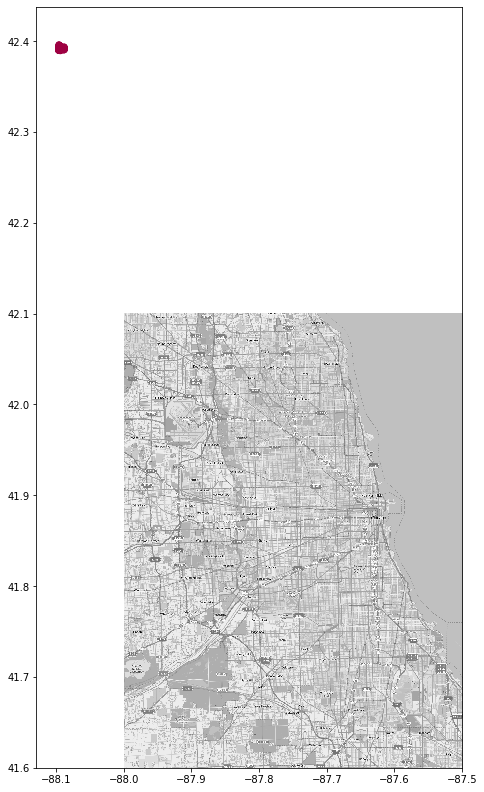

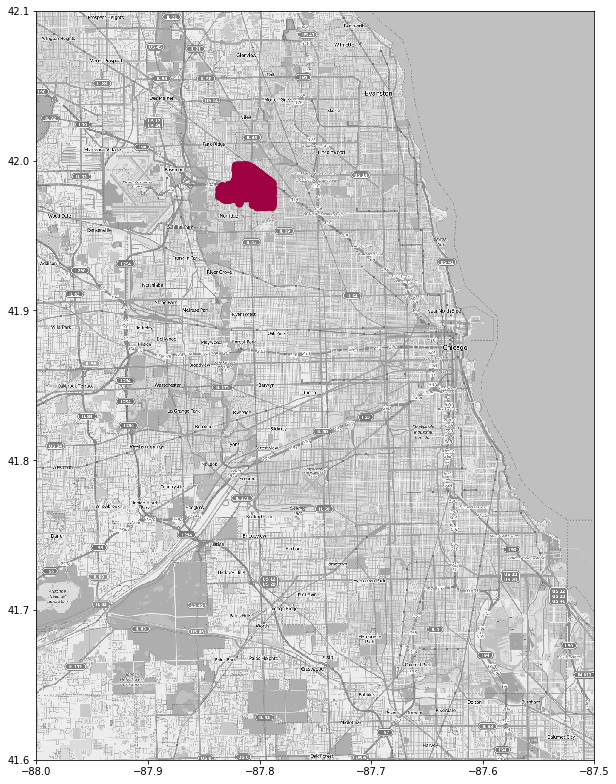

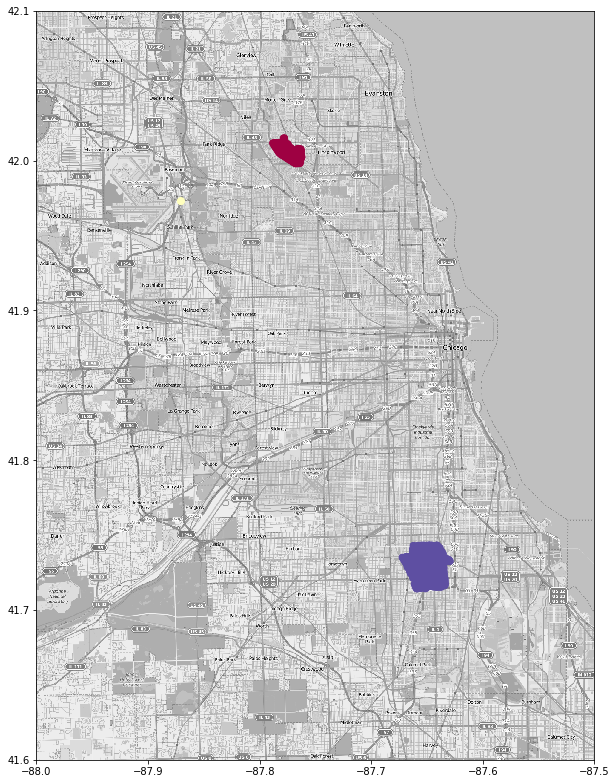

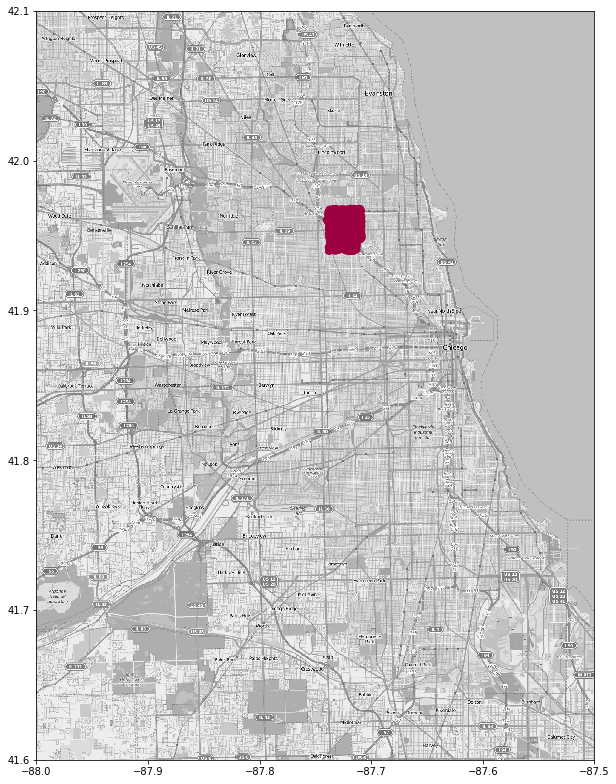

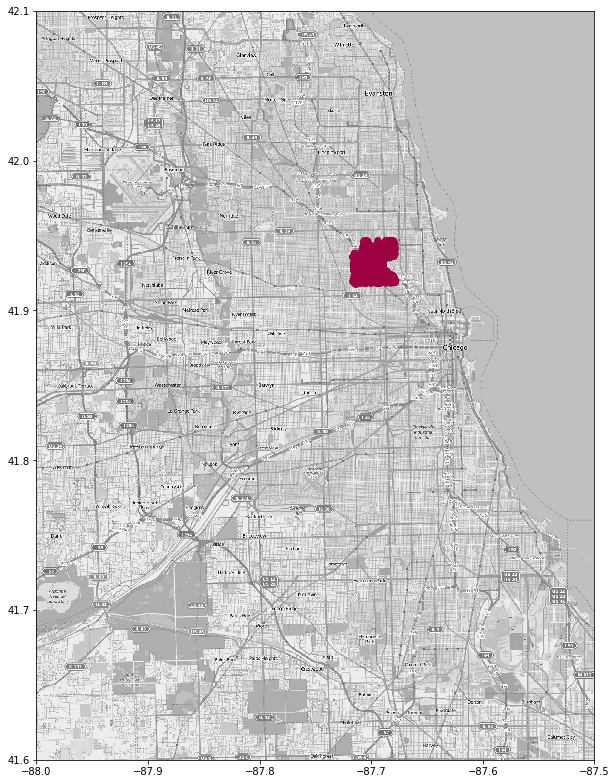

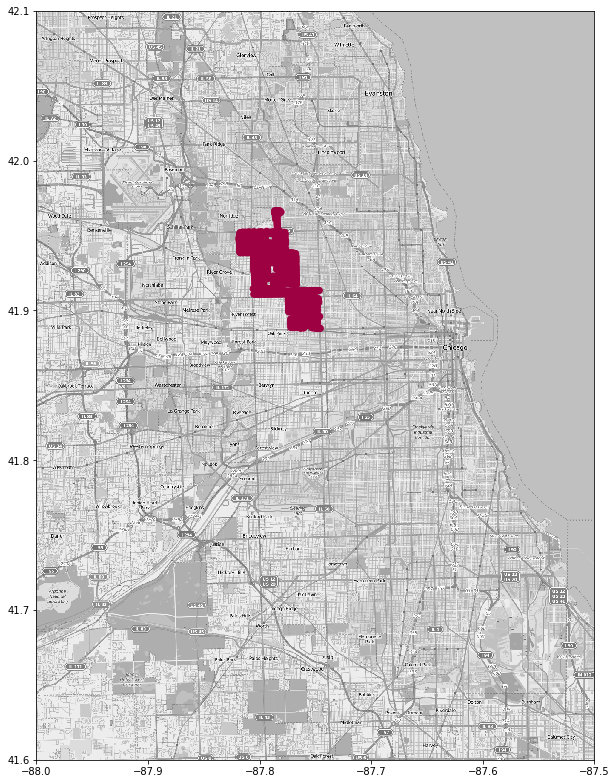

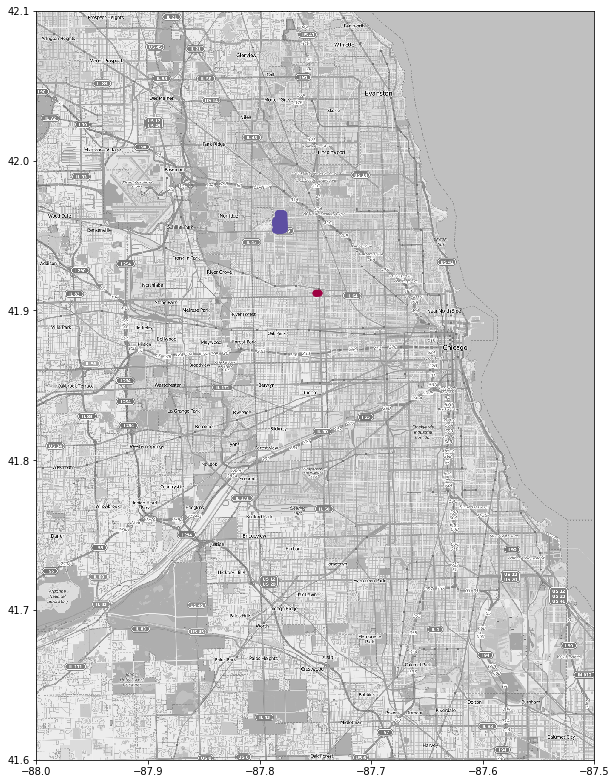

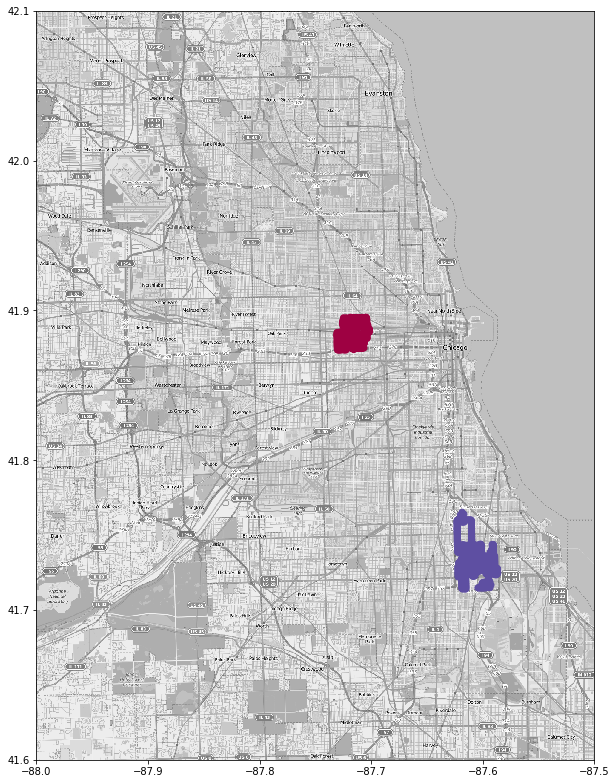

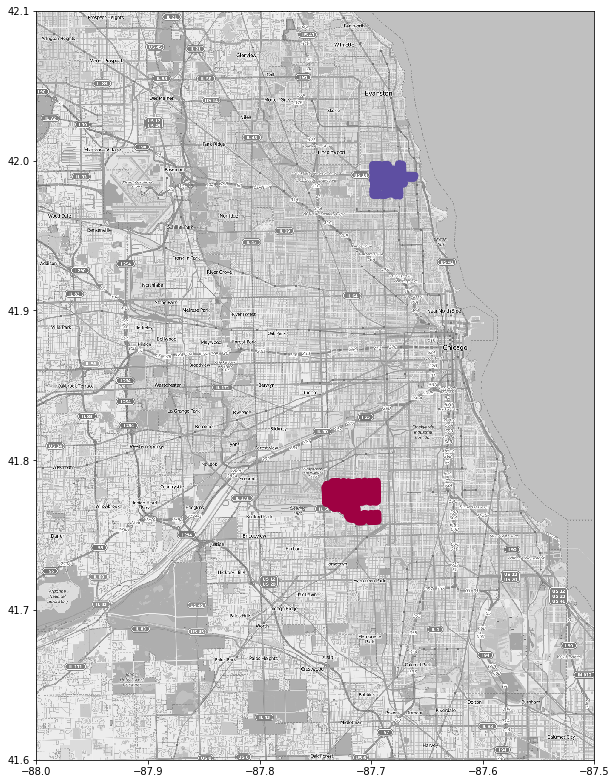

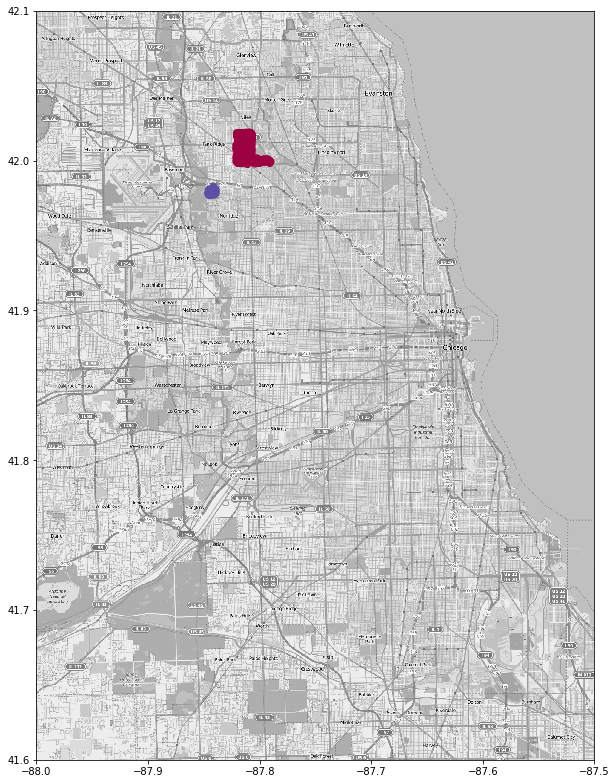

In [58]:
for uniqdate in list(df_spray2['Date'].unique()):
    df =  df_spray2[df_spray2['Date']==uniqdate]
    f.gen_map()
    plt.scatter(x=df['Longitude'],y=df['Latitude'],c=df['cluster'],cmap='Spectral')

In [23]:
df_spray_bydate = df_spray.groupby(['Date'])

In [25]:
list(df_spray_bydate)

[(Timestamp('2011-08-29 00:00:00'),
           Date                Time   Latitude  Longitude
  0  2011-08-29 2020-05-27 18:56:58  42.391623 -88.089163
  1  2011-08-29 2020-05-27 18:57:08  42.391348 -88.089163
  2  2011-08-29 2020-05-27 18:57:18  42.391022 -88.089157
  3  2011-08-29 2020-05-27 18:57:28  42.390637 -88.089158
  4  2011-08-29 2020-05-27 18:57:38  42.390410 -88.088858
  ..        ...                 ...        ...        ...
  90 2011-08-29 2020-05-27 19:14:38  42.392902 -88.093853
  91 2011-08-29 2020-05-27 19:14:48  42.392587 -88.093867
  92 2011-08-29 2020-05-27 19:14:58  42.392308 -88.093873
  93 2011-08-29 2020-05-27 19:15:18  42.392183 -88.093767
  94 2011-08-29 2020-05-27 19:15:28  42.392508 -88.093847
  
  [95 rows x 4 columns]),
 (Timestamp('2011-09-07 00:00:00'),
             Date                Time   Latitude  Longitude
  95   2011-09-07 2020-05-27 19:52:52  41.981433 -87.787777
  96   2011-09-07 2020-05-27 19:53:02  41.980998 -87.787778
  97   2011-09-07 2020-

In [20]:
df_spray_2 = pd.DataFrame(columns=['Date','Spray_Lat','Spray_Long'])

for date, df_date in df_spray_bydate:
    df_spray_2.loc[len(df_spray_2)] = [date, 
                                       list(df_date['Latitude']), 
                                       list(df_date['Longitude'])]

In [21]:
df_spray_2

Date                                          Spray_Lat  \
0 2011-08-29  [42.3916233333333, 42.3913483333333, 42.391021...   
1 2011-09-07  [41.9814333333333, 41.9809983333333, 41.98056,...   
2 2013-07-17  [41.9977283333333, 41.99799, 41.99823666666670...   
3 2013-07-25  [41.96052, 41.960515, 41.960508333333294, 41.9...   
4 2013-08-08  [41.9191283333333, 41.918935, 41.9186650000000...   
5 2013-08-15  [41.9447183333333, 41.944125, 41.9437683333332...   
6 2013-08-16  [41.9600333333333, 41.9594683333333, 41.958976...   
7 2013-08-22  [41.8850833333333, 41.885011666666706, 41.8849...   
8 2013-08-29  [41.785636666666704, 41.785186666666704, 41.78...   
9 2013-09-05  [41.997975, 41.99857, 41.9995, 41.999970000000...   

                                          Spray_Long  
0  [-88.0891633333333, -88.0891633333333, -88.089...  
1  [-87.7877766666667, -87.7877783333333, -87.787...  
2  [-87.7675316666667, -87.768085, -87.7686233333...  
3  [-87.7397833333333, -87.7397866666667, -87.739...  
4  [-87.6967366666667, -87.696405, -87.6959483333...  
5  [-87.8081866666667, -87.8081766666667, -87.808...  
6  [-87.785495, -87.7854783333333, -87.7854566666...  
7  [-87.7197966666667, -87.7188633333333, -87.717...  
8  [-87.7130033333333, -87.7129966666667, -87.712...  
9  [-87.7909116666667, -87.7909066666667, -87.790...

In [22]:
df_merged = pd.merge(df_train_2,df_weather_2, on='Date',how='outer')

In [23]:
df_merged = pd.merge(df_merged, df_spray_2, on='Date',how='outer')

In [37]:
df_merged

Date                                            Species  \
0    2007-05-29  [CULEX PIPIENS/RESTUANS,CULEX RESTUANS, CULEX ...   
1    2007-06-05  [CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX P...   
2    2007-06-26  [CULEX PIPIENS/RESTUANS, CULEX PIPIENS/RESTUAN...   
3    2007-06-29  [CULEX PIPIENS/RESTUANS, CULEX RESTUANS, CULEX...   
4    2007-07-02  [CULEX PIPIENS/RESTUANS,CULEX RESTUANS, CULEX ...   
...         ...                                                ...   
1467 2014-10-27                                                NaN   
1468 2014-10-28                                                NaN   
1469 2014-10-29                                                NaN   
1470 2014-10-30                                                NaN   
1471 2014-10-31                                                NaN   

                                               Trap_Lat  \
0     [41.95469, 41.994991, 41.974089, 41.9216, 41.8...   
1     [41.95469, 41.981964000000005, 41.944869, 41.9...   
2     [41.953705, 41.95469, 41.964242, 41.990284, 41...   
3     [41.95469, 41.990284, 41.991429, 41.923738, 41...   
4     [41.95469, 41.964242, 41.942114000000004, 41.9...   
...                                                 ...   
1467                                                NaN   
1468                                                NaN   
1469                                                NaN   
1470                                                NaN   
1471                                                NaN   

                                              Trap_Long  \
0     [-87.800991, -87.769279, -87.824812, -87.66645...   
1     [-87.800991, -87.812827, -87.832763, -87.82481...   
2     [-87.733974, -87.800991, -87.757639, -87.79712...   
3     [-87.800991, -87.797127, -87.747113, -87.78528...   
4     [-87.800991, -87.757639, -87.776385, -87.79712...   
...                                                 ...   
1467                                                NaN   
1468                                                NaN   
1469                                                NaN   
1470                                                NaN   
1471                                                NaN   

                                           NumMosquitos  \
0     [2, 1, 5, 2, 1, 3, 1, 1, 5, 2, 1, 3, 6, 3, 1, ...   
1     [9, 2, 1, 3, 1, 1, 1, 2, 1, 3, 4, 1, 4, 2, 2, ...   
2     [1, 6, 2, 2, 5, 2, 6, 2, 1, 4, 1, 1, 10, 5, 1,...   
3     [2, 1, 1, 1, 1, 3, 2, 1, 3, 2, 1, 5, 2, 3, 2, ...   
4     [5, 1, 3, 1, 8, 7, 2, 6, 1, 7, 6, 3, 1, 1, 1, ...   
...                                                 ...   
1467                                                NaN   
1468                                                NaN   
1469                                                NaN   
1470                                                NaN   
1471                                                NaN   

                                             WnvPresent Station          Tavg  \
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  [1, 2]  [74.0, 77.0]   
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  [1, 2]  [56.0, 57.0]   
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  [1, 2]  [81.0, 82.0]   
3     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  [1, 2]  [63.0, 64.0]   
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  [1, 2]  [66.0, 68.0]   
...                                                 ...     ...           ...   
1467                                                NaN  [1, 2]  [64.0, 67.0]   
1468                                                NaN  [1, 2]  [57.0, 57.0]   
1469                                                NaN  [1, 2]  [43.0, 45.0]   
1470                                                NaN  [1, 2]  [42.0, 45.0]   
1471                                                NaN  [1, 2]  [40.0, 42.0]   

     Spray_Lat Spray_Long  
0          NaN        NaN  
1          NaN

In [34]:
df_merged.isnull().sum()

Date               0
Species         1377
Trap_Lat        1377
Trap_Long       1377
NumMosquitos    1377
WnvPresent      1377
Station            0
Tavg               0
Spray_Lat       1462
Spray_Long      1462
dtype: int64

In [40]:
df_test = df_merged[df_merged['Spray_Lat'].isnull() == False]

In [41]:
df_test

Date                                            Species  \
85   2013-07-25  [CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX P...   
87   2013-08-08  [CULEX PIPIENS/RESTUANS,CULEX PIPIENS/RESTUANS...   
88   2013-08-15  [CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX P...   
89   2013-08-22  [CULEX PIPIENS/RESTUANS,CULEX PIPIENS, CULEX P...   
90   2013-08-29  [CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX P...   
880  2011-08-29                                                NaN   
887  2011-09-07                                                NaN   
1192 2013-07-17                                                NaN   
1217 2013-08-16                                                NaN   
1235 2013-09-05                                                NaN   

                                               Trap_Lat  \
85    [41.95469, 41.964242, 42.008314, 41.9924780000...   
87    [41.95469, 41.964242, 42.008314, 41.9924780000...   
88    [41.95469, 41.964242, 42.008314, 41.9924780000...   
89    [41.95469, 41.964242, 42.008314, 41.9924780000...   
90    [41.95469, 41.964242, 42.008314, 41.9924780000...   
880                                                 NaN   
887                                                 NaN   
1192                                                NaN   
1217                                                NaN   
1235                                                NaN   

                                              Trap_Long  \
85    [-87.800991, -87.757639, -87.77792099999999, -...   
87    [-87.800991, -87.757639, -87.77792099999999, -...   
88    [-87.800991, -87.757639, -87.77792099999999, -...   
89    [-87.800991, -87.757639, -87.77792099999999, -...   
90    [-87.800991, -87.757639, -87.77792099999999, -...   
880                                                 NaN   
887                                                 NaN   
1192                                                NaN   
1217                                                NaN   
1235                                                NaN   

                                           NumMosquitos  \
85    [28, 16, 118, 90, 9, 86, 14, 9, 5, 41, 8, 37, ...   
87    [196, 28, 165, 108, 17, 56, 141, 16, 1, 61, 55...   
88    [11, 9, 59, 33, 23, 19, 40, 7, 3, 9, 139, 166,...   
89    [46, 23, 124, 95, 3, 12, 12, 9, 2, 37, 14, 83,...   
90    [70, 30, 51, 196, 7, 18, 124, 11, 4, 5, 22, 47...   
880                                                 NaN   
887                                                 NaN   
1192                                                NaN   
1217                                                NaN   
1235                                                NaN   

                                             WnvPresent Station          Tavg  \
85    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  [1, 2]  [69.0, 70.0]   
87    [4, 1, 0, 1, 1, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, ...  [1, 2]  [72.0, 74.0]   
88    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, ...  [1, 2]  [65.0, 66.0]   
89    [2, 1, 0, 0, 0, 1, 0, 0, 0, 2, 2, 1, 0, 1, 0, ...  [1, 2]  [73.0, 73.0]   
90    [1, 1, 1, 3, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, ...  [1, 2]  [78.0, 78.0]   
880                                                 NaN  [1, 2]  [69.0, 70.0]   
887                                                 NaN  [1, 2]  [61.0, 64.0]   
1192                                                NaN  [1, 2]  [85.0, 86.0]   
1217                                                NaN  [1, 2]  [69.0, 70.0]   
1235                                                NaN  [1, 2]  [67.0, 70.0]   

                                              Spray_Lat  \
85    [41.96052, 41.960515, 41.960508333333294, 41.9...   
87    [41.9191283333333, 41.918935, 41.9186650000000...   
88    [41.9447183333333, 41.944125, 41.9437683333332...   
89    [41.8850833333333, 41.885011666666706, 41.8849...   
90    [41.785636666666704, 41.785186666666704, 41.78...   
880   [42.3916233333333, 42.3913483333333, 4

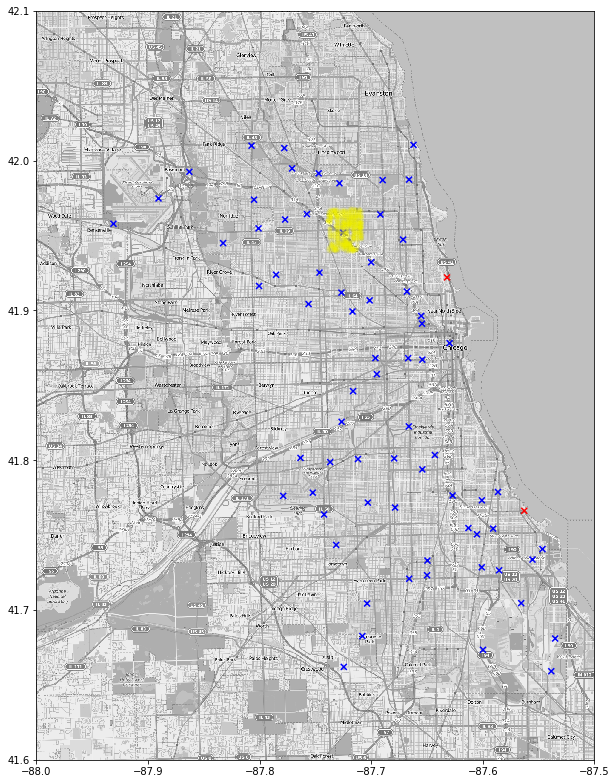

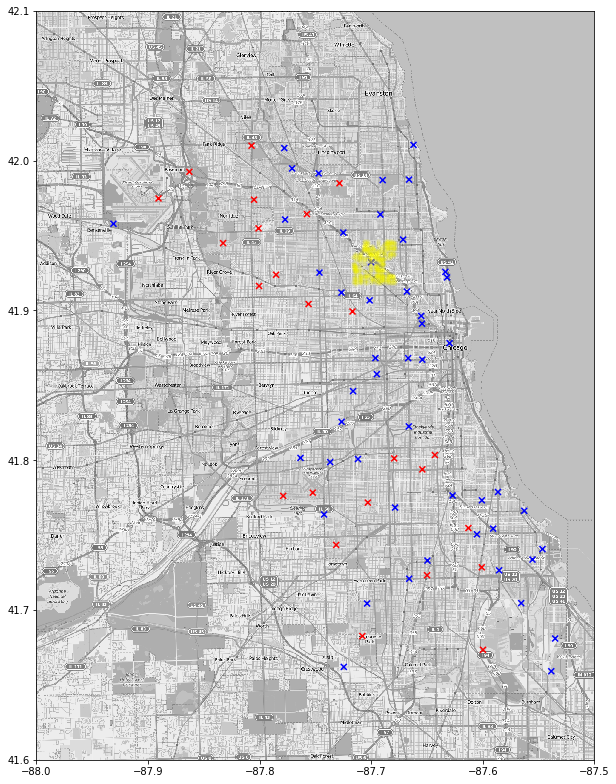

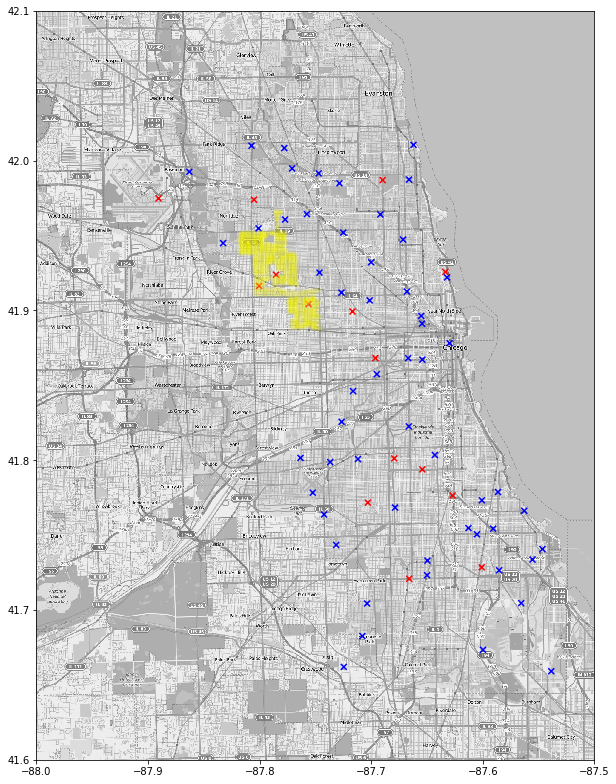

In [39]:
count = 0


for index, row in df_test.iterrows():
    trap_plots_present = False
    spray_plots_present = False
    f.gen_map()
    
    if isinstance(row['Species'],list):
        trap_plots_present = True
        trap_plots = plt.scatter(x=row['Trap_Long'], 
                                 y=row['Trap_Lat'],
                                 marker='x',
                                 c= ['blue' if x == 0 else 'red' for x in row["WnvPresent"]]);

    if isinstance(row['Spray_Long'],list):
        spray_plots_present = True
        spray_plots = plt.scatter(x=row['Spray_Long'], 
                                  y=row['Spray_Lat'],
                                  marker='o',
                                  s=12,
                                  c='yellow',
                                  alpha=0.05)
        
#     if trap_plots_present:
#         trap_plots.remove()
#     if spray_plots_present:
#         spray_plots.remove()
    count += 1
    
    if count == 3:
        break